In [1]:
%matplotlib inline
from nanovna import NanoVNA

In [2]:
#reload script
%run nanovna.py

In [2]:
#instanceを生成
nv = NanoVNA('/dev/cu.usbmodem401')

In [3]:
nv.fetch_frequencies()

In [8]:
s11 = nv.data(0)
s12 = nv.data(1)

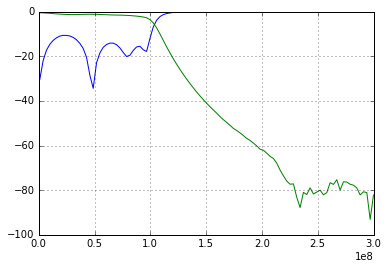

In [9]:
nv.logmag(s11)
nv.logmag(s12)

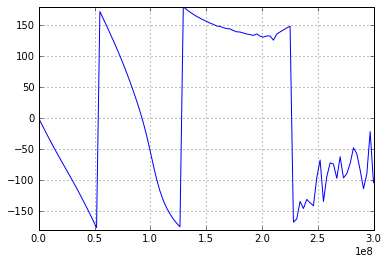

In [10]:
nv.phase(s12)

In [11]:
s11

array([ 0.02341891-0.01932788j,  0.00707660-0.079767j  ,
       -0.02694627-0.13427958j, -0.07665737-0.16863626j,
       -0.13404523-0.18186711j, -0.19068630-0.17502719j,
       -0.23895971-0.15171185j, -0.27192709-0.11150361j,
       -0.28541949-0.06412426j, -0.28357497-0.01661946j,
       -0.26252094+0.03132603j, -0.22414946+0.06428533j,
       -0.17412527+0.08607276j, -0.12071022+0.08761155j,
       -0.06558844+0.0678422j , -0.02012970+0.03188221j,
        0.00816156-0.01728208j,  0.01533231-0.06997578j,
        0.00509378-0.11836059j, -0.02004478-0.15749748j,
       -0.05157295-0.17565535j, -0.08396260-0.17794099j,
       -0.10976810-0.16326575j, -0.11683880-0.13783102j,
       -0.10560337-0.11172962j, -0.07770808-0.09324122j,
       -0.04107541-0.0896017j , -0.00254240-0.10523073j,
        0.02081765-0.13326301j,  0.02799014-0.15902352j,
        0.02395818-0.1656454j ,  0.02989859-0.13648313j,
        0.09309933-0.08746582j,  0.23875974-0.07373825j,
        0.41306356-0.1840377j ,

## scikit-rfでスミスチャート

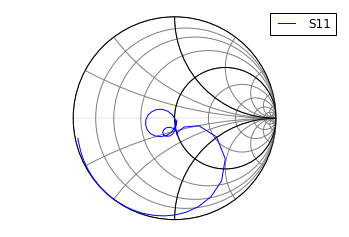

In [12]:
#scikit-rf(skrf)を使ってスミスチャートをプロット
n = nv.smith(s11)

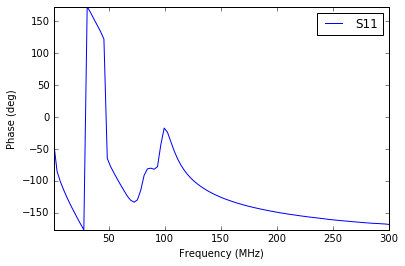

In [13]:
#nv.smith()の返値はskrfのNetworkのインスタンス。いろいろとプロットできる。
n.plot_s_deg()

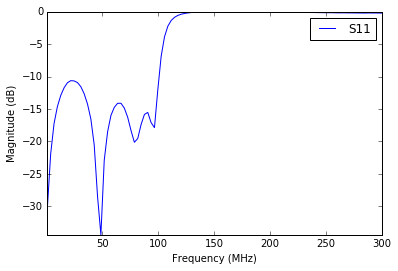

In [14]:
n.plot_s_db()

## touchstoneファイルを読み書き

In [23]:
#skrfのNetworkのインスタンスに変換
n = nv.skrf_network(a)
#ファイルに書き出す
n.write_touchstone('100mhz-lpf-s11')

In [24]:
#ファイルを確認
!cat 100mhz-lpf-s11.s1p

!Created with skrf (http://scikit-rf.org).
# MHz S RI R 50.0 
!freq ReS11 ImS11
1.0 0.012460355 -0.015879744
3.99 -0.008661273 -0.069707974
6.98 -0.042227279 -0.115677334
9.97 -0.092017509 -0.143823102
12.96 -0.147657468 -0.149449899
15.95 -0.201385751 -0.135523363
18.94 -0.243053123 -0.102494128
21.93 -0.270805299 -0.057194426
24.92 -0.279718816 -0.006995845
27.91 -0.26907292 0.044069305
30.9 -0.240883052 0.086606264
33.89 -0.198594421 0.115753814
36.88 -0.148413732 0.127066627
39.87 -0.095692999 0.120097838
42.86 -0.051569625 0.092090547
45.85 -0.021049311 0.050145152
48.84 -0.008668005 0.000488108
51.83 -0.01736783 -0.046825736
54.82 -0.043845944 -0.085811898
57.81 -0.07889305 -0.108475185
60.8 -0.115591615 -0.111082322
63.79 -0.144830152 -0.100106723
66.78 -0.161541178 -0.078393302
69.77 -0.160680696 -0.052953913
72.76 -0.145111352 -0.035594791
75.75 -0.12046393 -0.031371835
78.74 -0.096017956 -0.045363258
81.73 -0.079670108 -0.068865291
84.72 -0.079107657 -0.096139885
87.71 -0.086

In [25]:
#再読み込み
import skrf
skrf.Network('100mhz-lpf-s11.s1p')

1-Port Network: '100mhz-lpf-s11',  1-300 MHz, 101 pts, z0=[ 50.+0.j]

In [26]:
#独自形式で書き出す
n.write('100mhz-lpf')

In [27]:
#独自形式を読み込む
import skrf
skrf.read('100mhz-lpf.ntwk')

1-Port Network: '',  1-300 MHz, 101 pts, z0=[ 50.+0.j]